# Challenge Problem Week 1

Hepatitis B (HEP B) is a liver infection caused by the hepatitis B virus (HBV). The infection causes inflammation of the liver and if not properly treated, the virus can lead to liver disease such as cirrhosis or liver cancer. 
HEP B is the most primary cause of liver cancer, the 2nd leading cause of cancer deaths in the world, therfore making it a major global health problem. HEP B is up to 100 times more infectious than the HIV/AIDS virus. Two billion people (1 in 3) have been infected and more than 292 million people are living with a chronic hepatitis B infection. Although HEP B is treatable and preventable about 884,000 people die each year.

The virus is transmitted through the blood and infected bodily fluids. It can be passed to others through direct contact with blood, unprotected sex, use of illegal drugs, unsterilized or contaminated needles, and from an infected woman to her newborn during pregnancy or childbirth. Most people do not show symptoms and the only way to know you are infected is by getting tested.

![hepb](https://images.onhealth.com/images/slideshow/hepatitis-s1-liver-hepatitis-virus.jpg)

**Goal**: Use the NHANES data set to predict whether a patient has HEP B or not. We want to determine which attributes are the most meaningful to the predictive models. We want to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Essentially is there a way to identify the population of those infected without testing them? 

Source: https://www.hepb.org/what-is-hepatitis-b/what-is-hepb/ 

# National Health and Nutrition Examination Survey NHANES 
To investigate our research problem we will be using the NHANES database. NHANES is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

Source: Centers for Disease Control and Prevention (CDC). National Center for Health Statistics (NCHS). National Health and Nutrition Examination Survey Data. Hyattsville, MD: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, [2019][https://www.cdc.gov/nchs/nhanes/about_nhanes.htm#data].


Below are some general steps to begin analyzing this problem. Apply the new material you learned in class and have fun! (:

1. Import the data  
2. Decide what variables are most relevant  
3. Summary statistics of the data  
4. Data Cleaning (Important!) Note this may a tedious process  
a. Missing data  
b. Transform/Normalize data  
4. Data Visualization  
5. Data analysis  
a. Create dummy variables  
b. Create training and test sets  
c. Statistical methodology  
6. Scoring metrics  
confusion matrix, roc curve  


In [2]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import seaborn as sns
#import os

#os.chdir("./Week1Public")

## Import data
Read in the data set and look at the first ten lines

In [3]:
#import data
# Write your code here

dataset = pd.read_csv("challengeProblem1.train.csv") 
dataset.head(10)

C:\Users\Shuen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2595,2597,2599,2601,2603,2605,2607,2609,2611,2613,2615,2617,2619,2621,2623,2625,2627,2629,2631,2633,2635,2637,2639,2641,2643,2645,2647,2649,3194,4161,6581,6582,6584,6598,6599,6601,6855,6857,8094,8572,8573) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,DMQMILIT,...,MCQ300C.mcq.2,MCQ365A.mcq.2,MCQ365B.mcq.2,MCQ365C.mcq.2,MCQ365D.mcq.2,MCQ370A.mcq.2,MCQ370B.mcq.2,MCQ370C.mcq.2,MCQ370D.mcq.2,OSQ230.mcq.2
0,51624.0,6,2,1,34,409.0,410.0,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51626.0,6,2,1,16,202.0,202.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51627.0,6,2,1,10,131.0,132.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51628.0,6,2,2,60,722.0,722.0,4,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630.0,6,2,2,49,596.0,596.0,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51632.0,6,2,1,10,124.0,126.0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51634.0,6,2,1,10,121.0,121.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51635.0,6,2,1,80,NaN,NaN,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51638.0,6,2,1,9,115.0,116.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,51641.0,6,2,1,13,156.0,156.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dropping unnecessary variables (don't worry about this)
mydat = dataset[dataset.columns.drop(list(dataset.filter(regex='WT')))]
mydat = dataset[dataset.columns.drop(list(dataset.filter(regex='SDM')))]

Awesome, looks like the data loaded in properly. Let's continue by looking at variables that may be predictive of hepatitis B. For beginners, I would suggest conducting a literature review on previous research of hepatitis B.

## Select Features of Interest
Once you have selected some variables in the NHANES data set, make a smaller subset as shown below.

In [5]:
# create a subset of the data you want to analyze
# Write your code here
mydat = dataset[['LBXHBC', 'RIDAGEYR', 'RIDRETH1', 'RIAGENDR']] # create a subset of the selected features you want to investigate
mydat = mydat.rename(index = str, columns = {"LBXHBC": "HEPB", "RIDAGEYR": "Age","RIDRETH1":"Ethn", "RIAGENDR":"Sex" }) #renaming variables

Remember the goal is to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Next, we will look at some summary statistics of the variables you chose.

## View summary statistics
Some useful functions in pandas are describe() and info()

In [6]:
mydat.describe()

,HEPB,Age,Ethn,Sex
count,19821.000000,19821.000000,19821.000000,19821.000000
mean,1.942435,38.635689,3.008678,1.509056
std,0.232925,22.574420,1.239822,0.499931
min,1.000000,6.000000,1.000000,1.000000
25%,2.000000,17.000000,2.000000,1.000000
50%,2.000000,37.000000,3.000000,2.000000
75%,2.000000,58.000000,4.000000,2.000000
max,2.000000,80.000000,5.000000,2.000000


In [7]:
# info about the data including the index dtype and column dtypes, non-null values and memory usage
mydat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 0 to 19820
Data columns (total 4 columns):
HEPB    19821 non-null int64
Age     19821 non-null int64
Ethn    19821 non-null int64
Sex     19821 non-null int64
dtypes: int64(4)
memory usage: 774.3+ KB


Note the data types are float64, int64 or objects--if there are columns that are obviously numeric like Age but show as objects (or vice versa), we need to change.

## Data Cleaning

In [8]:
# identify columns by what type of data they hold --first numeric columns
numeric_columns = list(["Age"])

# categorical columns are everything else 
categorical_columns = list(set(mydat.columns) - set(numeric_columns))


# convert numeric columns from strings to numbers
mydat[numeric_columns] = mydat[numeric_columns].apply(pd.to_numeric)

# print statement for sanity check
print('Numerical Columns: ', numeric_columns)
print('Categorical Columns: ', categorical_columns)

mydat.head(10)


Numerical Columns:  ['Age']
Categorical Columns:  ['HEPB', 'Ethn', 'Sex']


,HEPB,Age,Ethn,Sex
0,2,34,3,1
1,2,16,4,1
2,2,10,4,1
3,2,60,4,2
4,2,49,3,2
5,2,10,2,1
6,2,10,1,1
7,2,80,3,1
8,2,9,3,1
9,2,13,4,1


Notice the counts for the columns are different therefore I will remove the rows with NAs (you should deal with missing data https://scikit-learn.org/stable/modules/impute.html#impute)

In [9]:
# remove NAs

mydat = mydat.dropna(axis='rows')
mydat.count()

HEPB    19821
Age     19821
Ethn    19821
Sex     19821
dtype: int64

Lastly, we will convert HEP B and Sex into indicator variables

In [10]:
# convert HEPB and Sex categorical column to indicator (0,1) variables (binary)
mydat['HEPB'] = pd.get_dummies(mydat['HEPB'], drop_first = True)
mydat['Sex'] = pd.get_dummies(mydat['Sex'], drop_first = True)

## Data Analysis and Visualization
As the name suggests, pandas.corr() will compute pairwise correlation of (numerical) columns, excluding NA/null values. Notice that in this case, since we've converted 'HEPB' to a number (0 or 1) we can see how correlated different features are with the HEPB label!

[Text(0, 0, 'Postive'), Text(0, 0, 'Negative')]

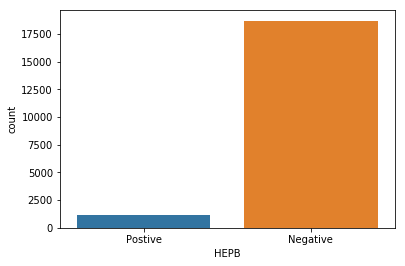

In [11]:
# univariate and bivariate description analysis 
hepb = sns.countplot(x='HEPB', data = mydat)
hepb.set_xticklabels(labels=['Postive', 'Negative'])

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

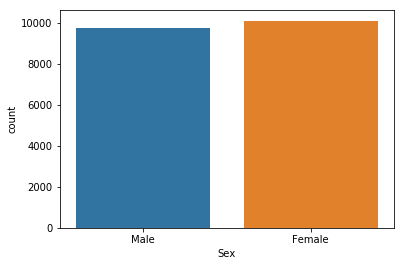

In [12]:
hepb = sns.countplot(x='Sex', data = mydat)
hepb.set_xticklabels(labels=['Male', 'Female'])

[Text(0, 0, 'Mexican American'),
 Text(0, 0, 'Other Hispanic'),
 Text(0, 0, 'Non-Hispanic White'),
 Text(0, 0, 'Non-Hispanic Black'),
 Text(0, 0, 'Other Race')]

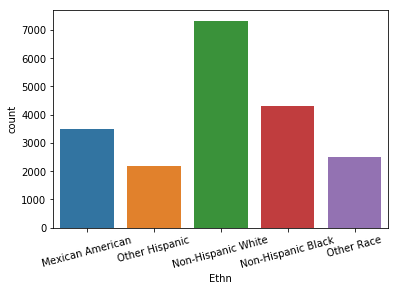

In [13]:
etplt = sns.countplot(x = 'Ethn', data = mydat)
etplt.set_xticklabels(labels=('Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Other Race'),rotation=15)

C:\Users\Shuen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


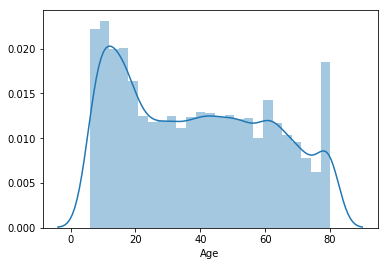

In [14]:
sns.distplot(mydat.Age)

AttributeError: 'FacetGrid' object has no attribute 'legend'

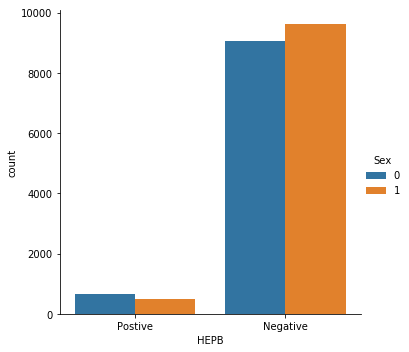

In [15]:
g = sns.catplot(x="HEPB", hue="Sex", data=mydat,
                 kind="count")
g.set_xticklabels(labels=['Postive', 'Negative'])
g.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])


In [16]:
mydat.corr()

,HEPB,Age,Ethn,Sex
HEPB,1.000000,-0.193469,-0.162324,0.043689
Age,-0.193469,1.000000,0.035343,0.012115
Ethn,-0.162324,0.035343,1.000000,-0.015674
Sex,0.043689,0.012115,-0.015674,1.000000


## Preprocessing data

Before we begin to implement a model, we need to prepare the variables that will be used. Let us see the levels in all categorical variables in order to create dummy\indicator variables for each level. At this step you'll have to normalize and transform variables if necessary.

In [17]:
# output the levels name of all categorical variables 
for col in categorical_columns:
    print(col, mydat[col].unique()) 

HEPB [1 0]
Ethn [3 4 2 1 5]
Sex [0 1]


In [18]:
# creating indicator/dummify for each level of your categorical variable
mydat1 = pd.get_dummies(mydat, columns = ["Ethn", "Sex"])

mydat1.head()


,HEPB,Age,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Sex_0,Sex_1
0,1,34,0,0,1,0,0,1,0
1,1,16,0,0,0,1,0,1,0
2,1,10,0,0,0,1,0,1,0
3,1,60,0,0,0,1,0,0,1
4,1,49,0,0,1,0,0,0,1


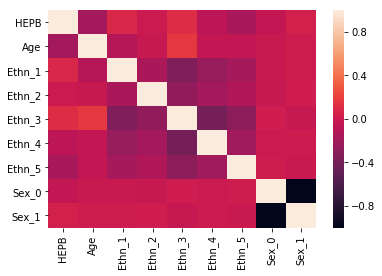

In [19]:
sns.heatmap(mydat1.corr())

In [20]:
#normalizing age variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data = mydat1.Age.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nAge'] = scaler.transform(norm_data)

#data_unitnorm
#sns.distplot(mydat1['nAge'])

mydat1 = mydat1.drop(['Age'], axis=1)
mydat1.head()

C:\Users\Shuen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shuen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,HEPB,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Sex_0,Sex_1,nAge
0,1,0,0,1,0,0,1,0,-0.205357
1,1,0,0,0,1,0,1,0,-1.002739
2,1,0,0,0,1,0,1,0,-1.268534
3,1,0,0,0,1,0,0,1,0.946419
4,1,0,0,1,0,0,0,1,0.459129


## Model training and selection
Now, let's split our data into training and testing in an 80-20 split, stratified by HEPB distribution (this tries to keep the HEPB distribution approximately equal for the training and test set). For consistency, let's use a random seed 0.

In [21]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(mydat1, test_size = 0.20, random_state = 0, stratify = mydat['HEPB'])


y_train = data_train['HEPB']
y_val = data_val['HEPB']

# only features 
X_train = data_train[["nAge","Ethn_1","Ethn_2", "Ethn_3","Ethn_4", "Ethn_5", "Sex_0" , "Sex_1"]]
X_val = data_val[["nAge","Ethn_1","Ethn_2", "Ethn_3","Ethn_4", "Ethn_5", "Sex_0" , "Sex_1"]]


X_train.head()

,nAge,Ethn_1,Ethn_2,Ethn_3,Ethn_4,Ethn_5,Sex_0,Sex_1
13206,-0.559749,0,0,0,1,0,0,1
7478,1.079316,0,0,1,0,0,0,1
18218,-1.047038,0,0,1,0,0,1,0
2330,1.433708,0,0,1,0,0,1,0
14058,0.016139,0,0,1,0,0,0,1


In [22]:
#define the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
results = logreg.fit(X_train, y_train)


C:\Users\Shuen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.metrics import auc

# apply the model to test data
y_val_predict = logreg.predict(X_val)
y_val_proba = logreg.predict_proba(X_val)

print(y_val[:5],y_val_predict[:5])

10593    1
14311    1
7364     1
9171     1
13382    1
Name: HEPB, dtype: uint8 [1 1 1 1 1]


# Scoring Metrics
## Confusion Matrix Metrics

There are several useful metrics that are derived from the confusion matrix:

![alt text](https://i.imgur.com/uipmEwt.png)

* sensitivity, **recall**, hit rate, or true positive rate (TPR) : $ \mathrm {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}$
 
* **precision** or positive predictive value (PPV) : $ \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$

* specificity or true negative rate (TNR) : $\mathrm {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}$

* miss rate or false negative rate (FNR) : $ \mathrm {FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR}$

* fall-out or false positive rate (FPR) : $\mathrm {FPR} ={\frac {\mathrm {FP} }{N}}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} $

* accuracy (ACC) : $\mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$





In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_val,y_val_proba)


-0.8987507570102672

The model is classifying everything as class 1... Pretty terrible. :( Well maybe there's a threshold where this doesn't happen. Let's look at the AUC ROC.

## AUC ROC

A receiver operating characteristic (ROC) is a probability curve that plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings. The area under the curve (AUC) represents a measure of separability or how much the model is capable of distinguishing between classes. An AUC closer to 1 is desirable as it shows the model is perfectly distinguishing between patients with disease and no disease. A poor model has an AUC $\leq$ 0.50.

In [25]:
# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

AUC:  0.8301967287767185


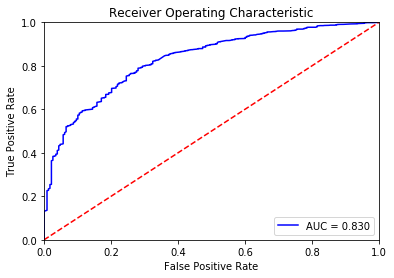

In [26]:
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This model only looks at three possible features and leaves lots of room for improvement!  Try using more features, different models, and see if you can do anything about the data we threw out earlier.

## Economic Cost
Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by **reducing the number of features** collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method.  This won't be evaluated quantitatively, but please consider discussing it for your presentation.

For your presentation on Friday, don't foget to mention why you selected the features you used, the model implemented, the scoring metrics mentioned above, make sure to have both results for test and training sets, and the limitations of your analysis.

# Next steps
For those that finish early, try different classification models such as decision trees, KNN, SVM etc. You can try tackling the multiclass classifier (predicting the different cases instead of simply negative or positive)!
